In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics

import time

In [105]:
column_names = ["Alcohol", "Malic Acid", "Ash", "Alcalinity Of Ash", "Magnesium", "Total Phenols",
               "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color_intensity", "Hue",
                "OD280/OD315 of diluted wines", "Proline"]

df = pd.read_csv("wine.data", names = column_names) 
df.reset_index(inplace = True)
df = df.rename({'index': 'Correct classification'}, axis='columns')
df

,Correct classification,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [106]:
df2 = df['Correct classification']
df2

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Correct classification, Length: 178, dtype: int64

In [107]:
df = df.iloc[:, 1:]
df

,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [108]:
#find number of null entries to see if there is a need to clean the dataset
df.isnull().sum()


Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity Of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [109]:
df.nunique()

Alcohol                         126
Malic Acid                      133
Ash                              79
Alcalinity Of Ash                63
Magnesium                        53
Total Phenols                    97
Flavanoids                      132
Nonflavanoid phenols             39
Proanthocyanins                 101
Color_intensity                 132
Hue                              78
OD280/OD315 of diluted wines    122
Proline                         121
dtype: int64

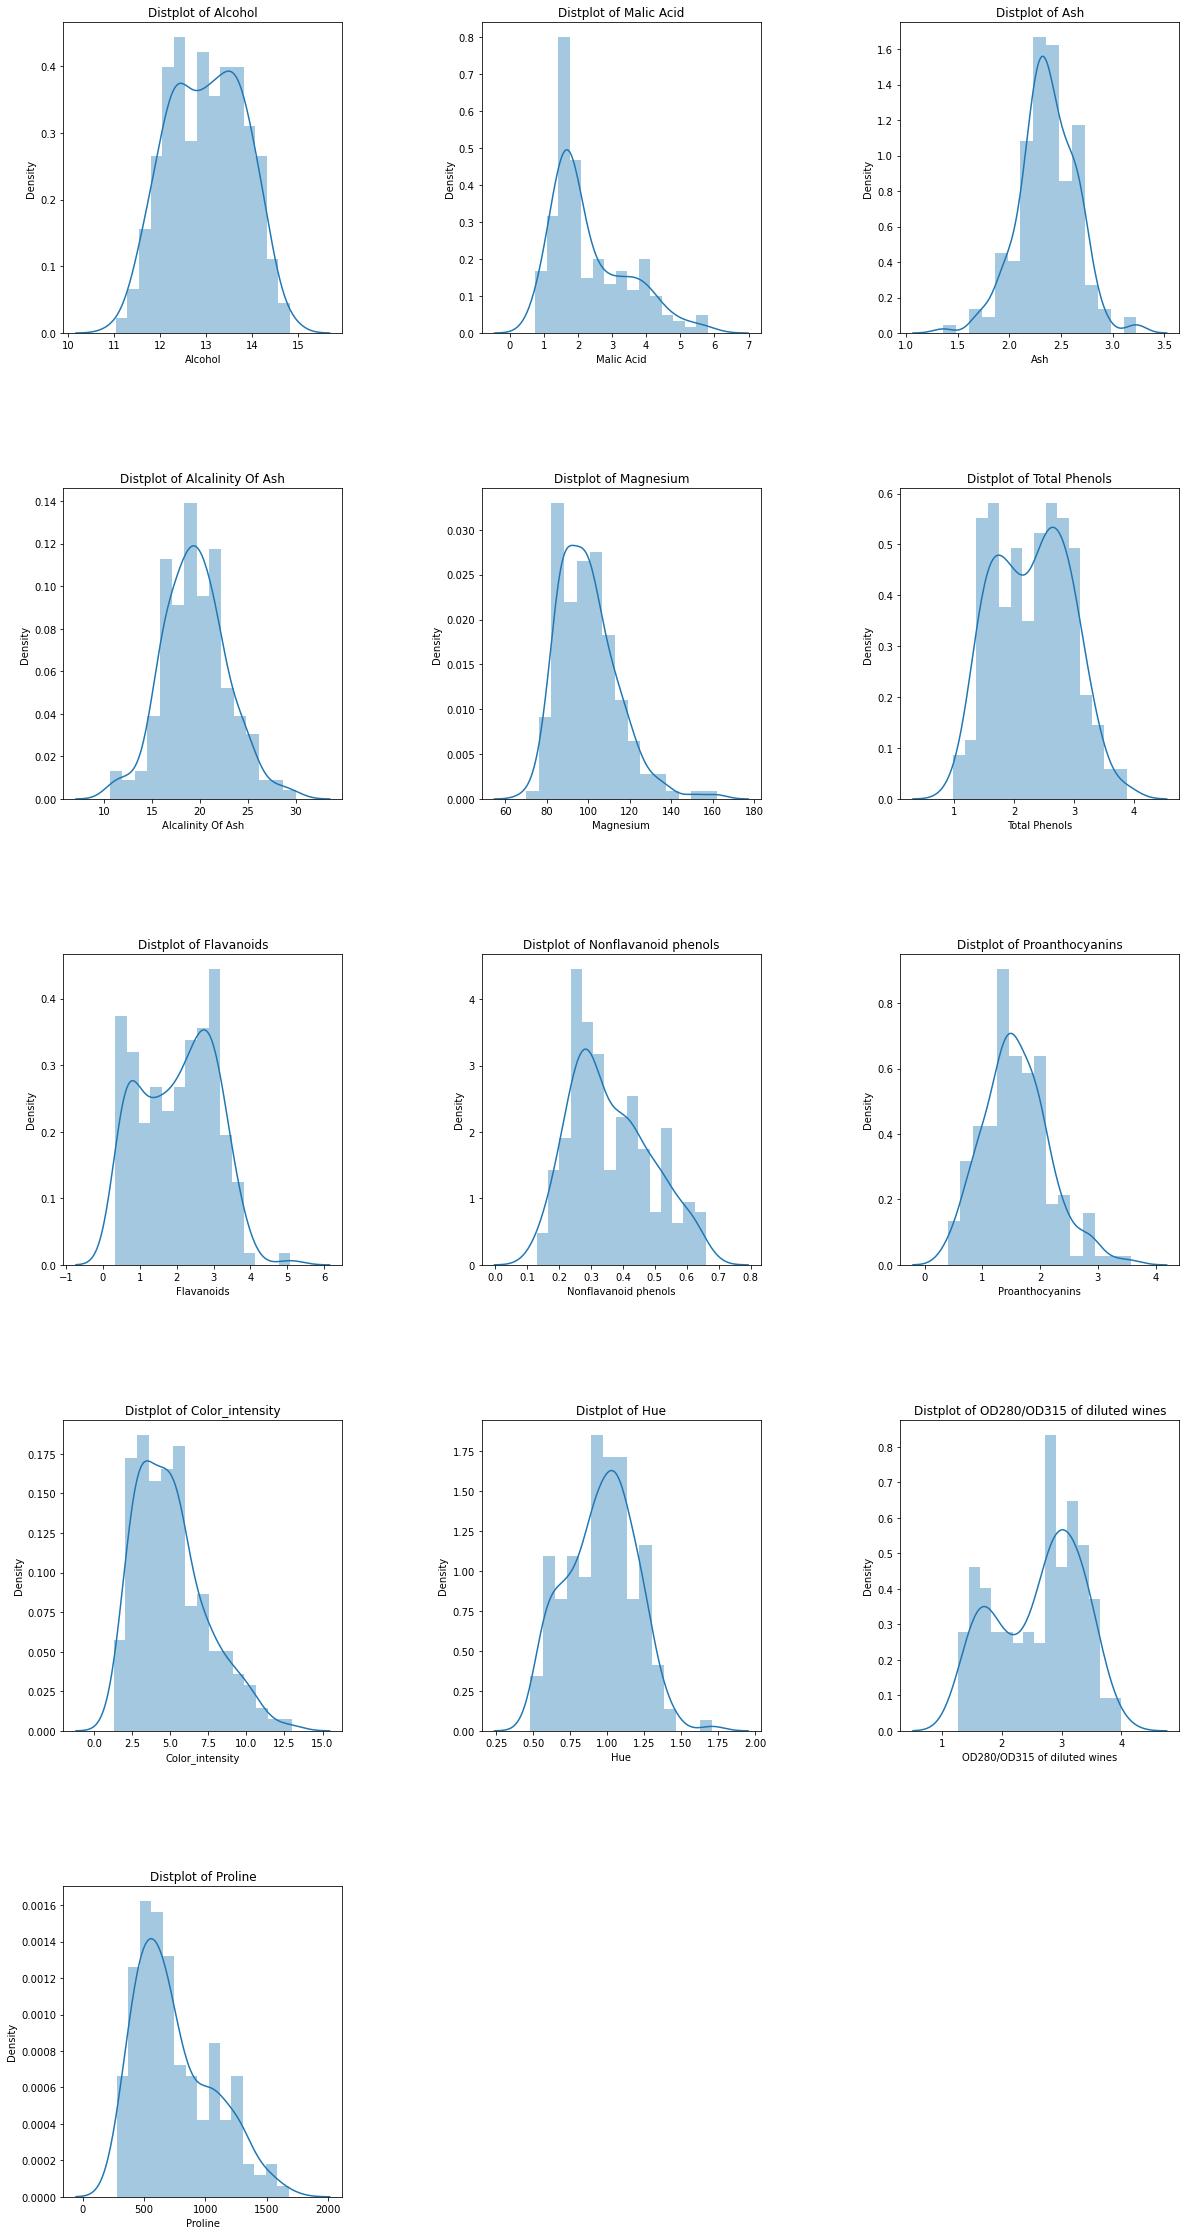

In [110]:
plt.figure(1 , figsize = (20 , 40))
n = 0 
for x in column_names:
    n += 1
    plt.subplot(5 , 3 , n)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [111]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,Alcohol,Malic Acid,Ash,Alcalinity Of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [112]:
# import PCA
from sklearn.decomposition import PCA 
# Applying PCA to visualize data
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_features_df)
pca_data

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

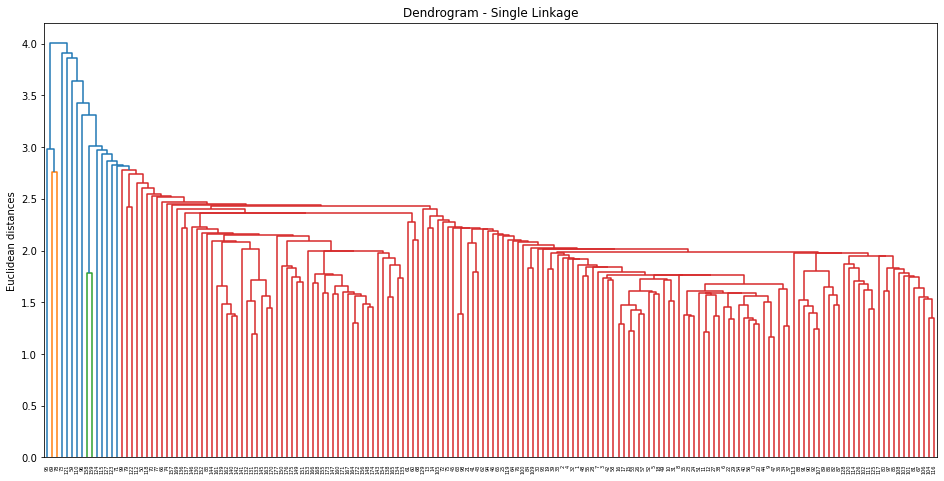

In [113]:
#Agglomerative clustering using single linkage method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "single"))

plt.title('Dendrogram - Single Linkage')
plt.ylabel('Euclidean distances')
plt.show()

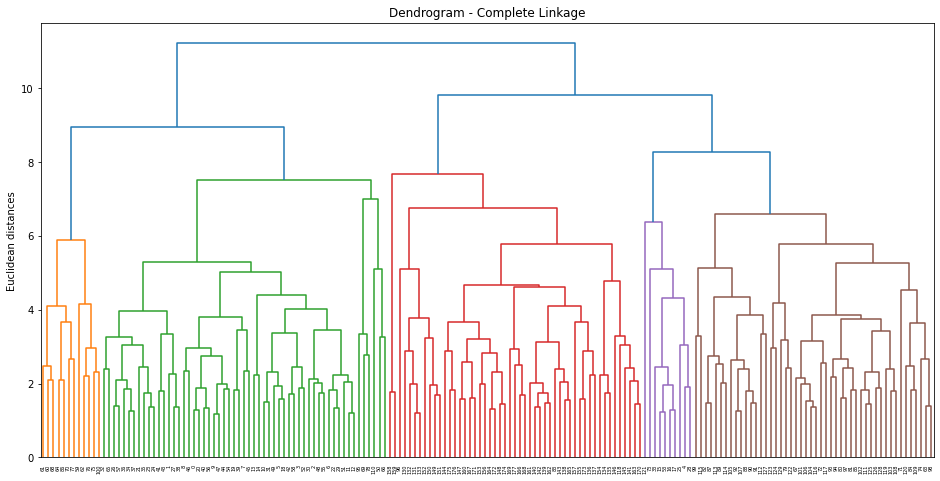

In [114]:
#Agglomerative clustering using complete linkage method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "complete"))

plt.title('Dendrogram - Complete Linkage')
plt.ylabel('Euclidean distances')
plt.show()

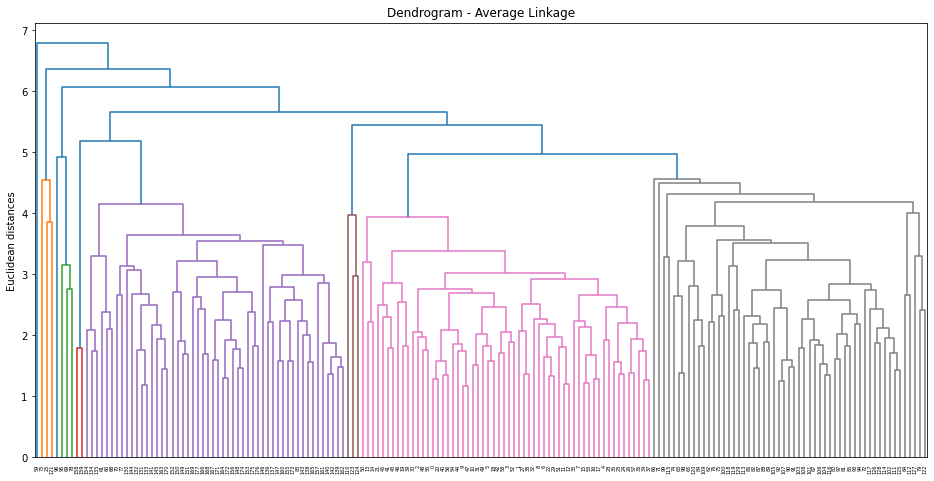

In [115]:
#Agglomerative clustering using average method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "average"))

plt.title('Dendrogram - Average Linkage')
plt.ylabel('Euclidean distances')
plt.show()

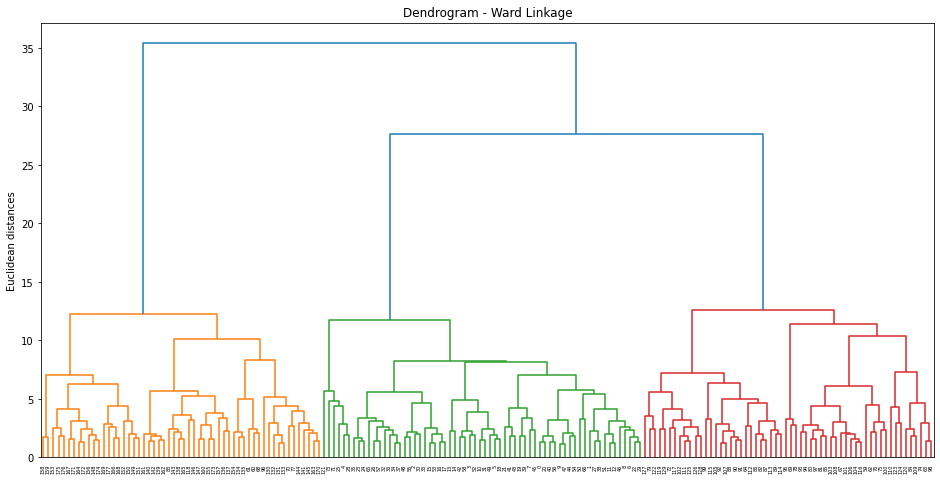

In [116]:
#Agglomerative clustering using ward method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "ward"))

plt.title('Dendrogram - Ward Linkage')
plt.ylabel('Euclidean distances')
plt.show()

In [117]:
def classification_accuracy(train_data, predicted_clusters, test_data):
    actual_labels = test_data.value_counts().index.tolist()
    train_data['predicted_clusters'] = predicted_clusters
    cluster_labels = pd.value_counts(pd.Series(predicted_clusters))
    cluster_labels = np.stack([cluster_labels.keys().values, cluster_labels.values]).T
    cluster_labels = cluster_labels.tolist()
    for i in range(len(cluster_labels)):
        cluster_labels[i].append(actual_labels[i])
    cluster_labels.sort()
    train_data['predicted_labels'] = list(map(lambda x : cluster_labels[x][2], train_data['predicted_clusters']))
    sum(train_data['predicted_labels']==test_data)
    accuracy = sum(train_data['predicted_labels']==test_data)/len(train_data)
    print("Classification accuracy: ", accuracy)

In [118]:
#Single-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='single')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run single-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df2)

Time taken to run single-linkage agglo. clustering (pre-PCA dataset):  0.003988027572631836
Silhouette score is:  0.18273797160972796
Davies Bouldin score is:  0.9105181111836432
Calinski Harabasz score is:  4.061664621973931
Classification accuracy:  0.37640449438202245


In [119]:
train_df['predicted_clusters'].value_counts()
# 5. Number of Instances

# class 1 59
# class 2 71
# class 3 48

0    174
1      3
2      1
Name: predicted_clusters, dtype: int64

Time taken to run single-linkage agglo. clustering (post-PCA dataset):  0.0019991397857666016
Silhouette score is:  0.01914988643982028
Davies Bouldin score is:  0.632038789439455
Calinski Harabasz score is:  2.577557572482101
Classification accuracy:  0.4101123595505618


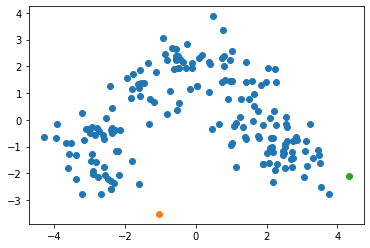

In [120]:
#Single-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='single')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run single-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df2)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [121]:
train_df['predicted_clusters'].value_counts()
# 5. Number of Instances

# class 1 59
# class 2 71
# class 3 48

0    176
2      1
1      1
Name: predicted_clusters, dtype: int64

In [122]:
#Complete-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run complete-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df2)

Time taken to run complete-linkage agglo. clustering (pre-PCA dataset):  0.0029611587524414062
Silhouette score is:  0.20378689690677748
Davies Bouldin score is:  1.8960960515907337
Calinski Harabasz score is:  48.989830186289424
Classification accuracy:  0.4157303370786517


In [123]:
train_df['predicted_clusters'].value_counts()
# 5. Number of Instances

# class 1 59
# class 2 71
# class 3 48

0    69
1    58
2    51
Name: predicted_clusters, dtype: int64

Time taken to run complete-linkage agglo. clustering (post-PCA dataset):  0.001994609832763672
Silhouette score is:  0.5135476900345355
Davies Bouldin score is:  0.6268401506869253
Calinski Harabasz score is:  277.3540471329343
Classification accuracy:  0.43820224719101125


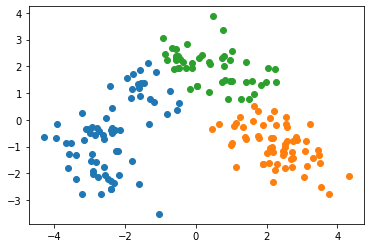

In [124]:
#Complete-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run complete-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df2)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [125]:
train_df['predicted_clusters'].value_counts()
# 5. Number of Instances

# class 1 59
# class 2 71
# class 3 48

0    68
1    61
2    49
Name: predicted_clusters, dtype: int64

In [126]:
#Average-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run average-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df2)

Time taken to run average-linkage agglo. clustering (pre-PCA dataset):  0.003985881805419922
Silhouette score is:  0.15752526243774145
Davies Bouldin score is:  1.0298902169850324
Calinski Harabasz score is:  4.031439116485448
Classification accuracy:  0.38764044943820225


In [127]:
train_df['predicted_clusters'].value_counts()
# 5. Number of Instances

# class 1 59
# class 2 71
# class 3 48

0    174
2      3
1      1
Name: predicted_clusters, dtype: int64

Time taken to run average-linkage agglo. clustering (post-PCA dataset):  0.0029914379119873047
Silhouette score is:  0.5542149847293696
Davies Bouldin score is:  0.6026496274530208
Calinski Harabasz score is:  333.5316667955987
Classification accuracy:  0.33146067415730335


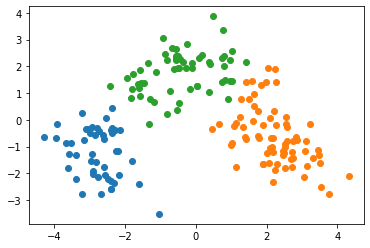

In [128]:
#Average-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run average-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df2)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [129]:
train_df['predicted_clusters'].value_counts()
# 5. Number of Instances

# class 1 59
# class 2 71
# class 3 48

1    71
2    59
0    48
Name: predicted_clusters, dtype: int64

In [130]:
#Ward-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run ward-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df2)

Time taken to run ward-linkage agglo. clustering (pre-PCA dataset):  0.003985881805419922
Silhouette score is:  0.2774439826952265
Davies Bouldin score is:  1.4185919431857321
Calinski Harabasz score is:  67.6474675044098
Classification accuracy:  0.29775280898876405


In [131]:
train_df['predicted_clusters'].value_counts()
# 5. Number of Instances

# class 1 59
# class 2 71
# class 3 48

2    64
0    58
1    56
Name: predicted_clusters, dtype: int64

Time taken to run ward-linkage agglo. clustering (post-PCA dataset):  0.0029916763305664062
Silhouette score is:  0.5590883962040384
Davies Bouldin score is:  0.601335729709085
Calinski Harabasz score is:  341.05824468634404
Classification accuracy:  0.9662921348314607


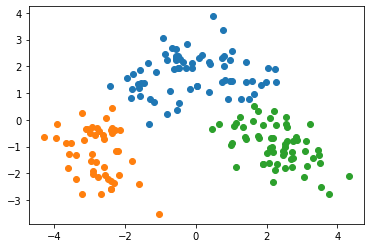

In [132]:
#Ward-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run ward-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df2)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [133]:
train_df['predicted_clusters'].value_counts()
# 5. Number of Instances

# class 1 59
# class 2 71
# class 3 48

0    69
2    61
1    48
Name: predicted_clusters, dtype: int64